In [7]:
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib as mpl
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import numpy as np
import warnings as wn
%load_ext autoreload
%autoreload 2
import esm2m.myfunctions as func

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
rootdir = '/local/ss23/GFDL_LEs/'
experiment = 'OCN/METABOLIC_INDEX/RCP85'
filename = 'MI_hitemp_sens_k01_ens*_1x1_1950_2100.nc'
path = rootdir+experiment+'/'+filename
z0_all = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')
z0_avg = z0_all.sel(ensemble=30)
z0_all = z0_all.sel(ensemble=slice(0,30))

OSError: no files to open

In [6]:
z0_testAvg = xr.open_dataset('/home/aos/ystochel/esm2m/data/processed/MI_hitemp_sens_k01_ensAvg_1950_2100.nc')

In [ ]:
filename = 'MI_hitemp_sens_k11_ens*_1x1_1950_2100.nc'
path = rootdir+experiment+'/'+filename
k11_all = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')
k11_avg = k11_all.sel(ensemble=30)
k11_all = k11_all.sel(ensemble=slice(0,30))

In [ ]:
z0_divide = z0_avg/2
k11_divide = k11_avg/2
z0_divideAll = z0_all/2
k11_divideAll = k11_all/2
total = 43210

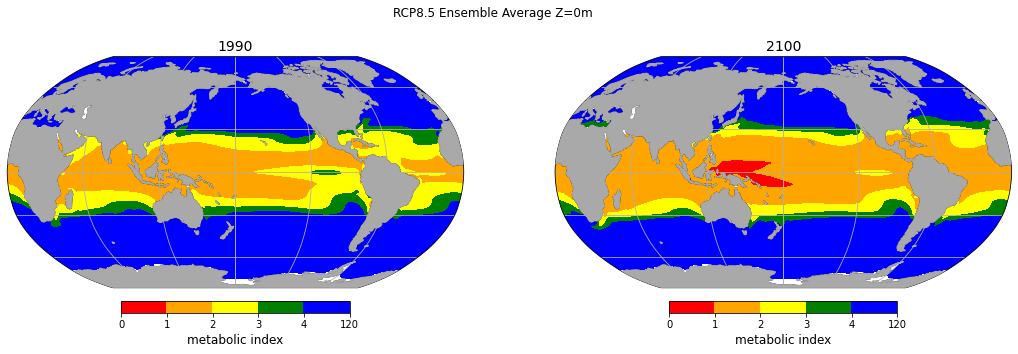

In [16]:
fig, (ax0,ax1) = plt.subplots(figsize=(18,5),nrows=1,ncols=2, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Ensemble Average Z=0m')
wn.filterwarnings('ignore')
func.graph(z0_avg, ax0, '1990', 1990, None, False)
func.graph(z0_avg, ax1, '2100', 2100, None, False)

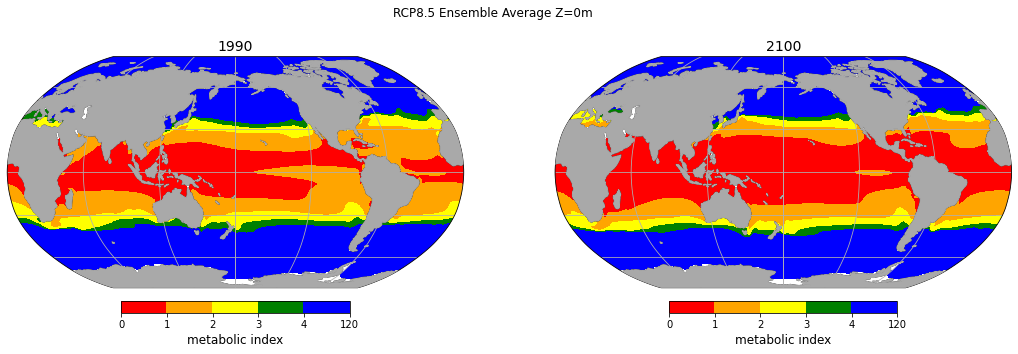

In [18]:
fig, (ax0,ax1) = plt.subplots(figsize=(18,5),nrows=1,ncols=2, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Ensemble Average Z=0m')
wn.filterwarnings('ignore')
func.graph(z0_divide, ax0, '1990', 1990, None, False)
func.graph(z0_divide, ax1, '2100', 2100, None, False)

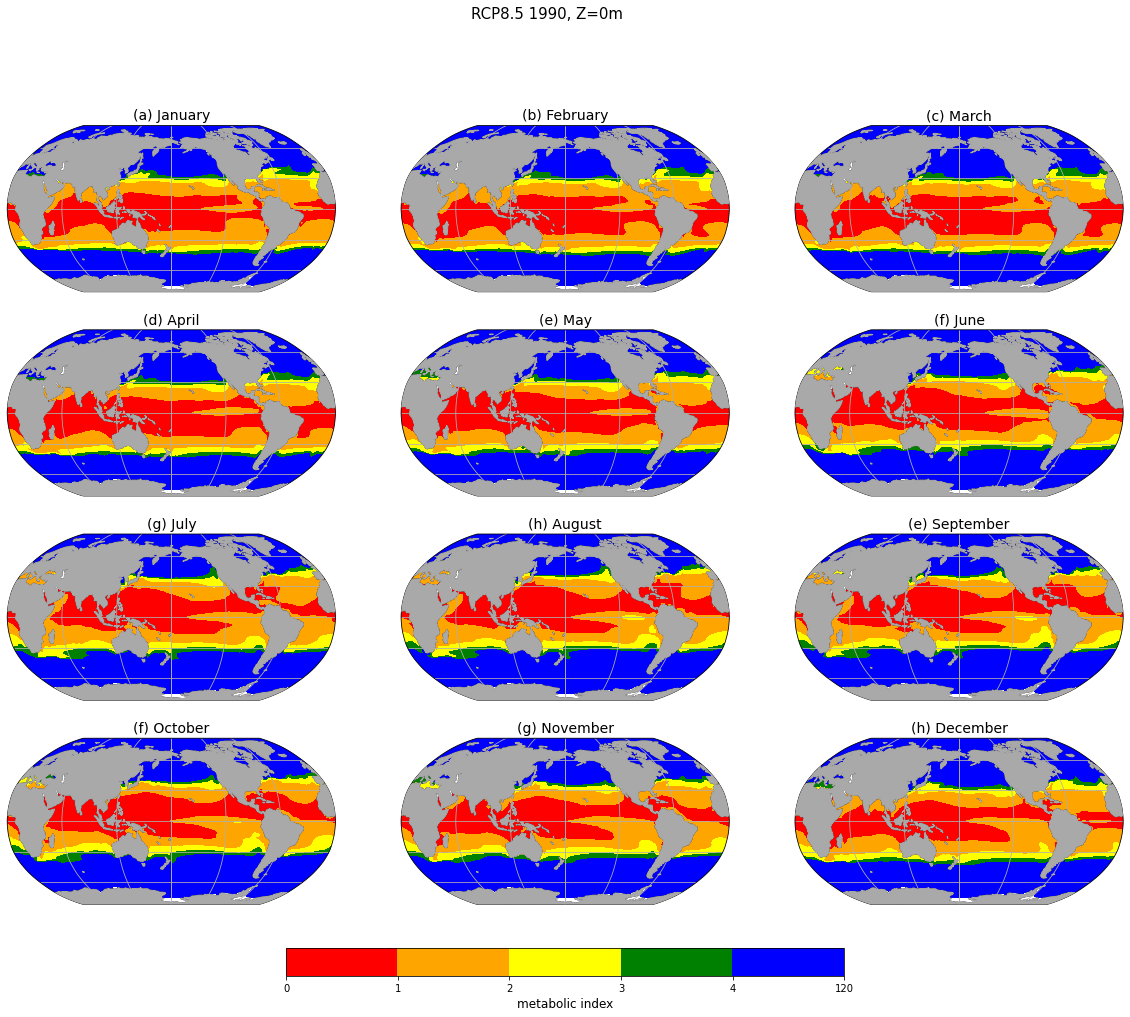

In [40]:
func.months_of_year(z0_divide, '1990', 'RCP8.5 1990, Z=0m')

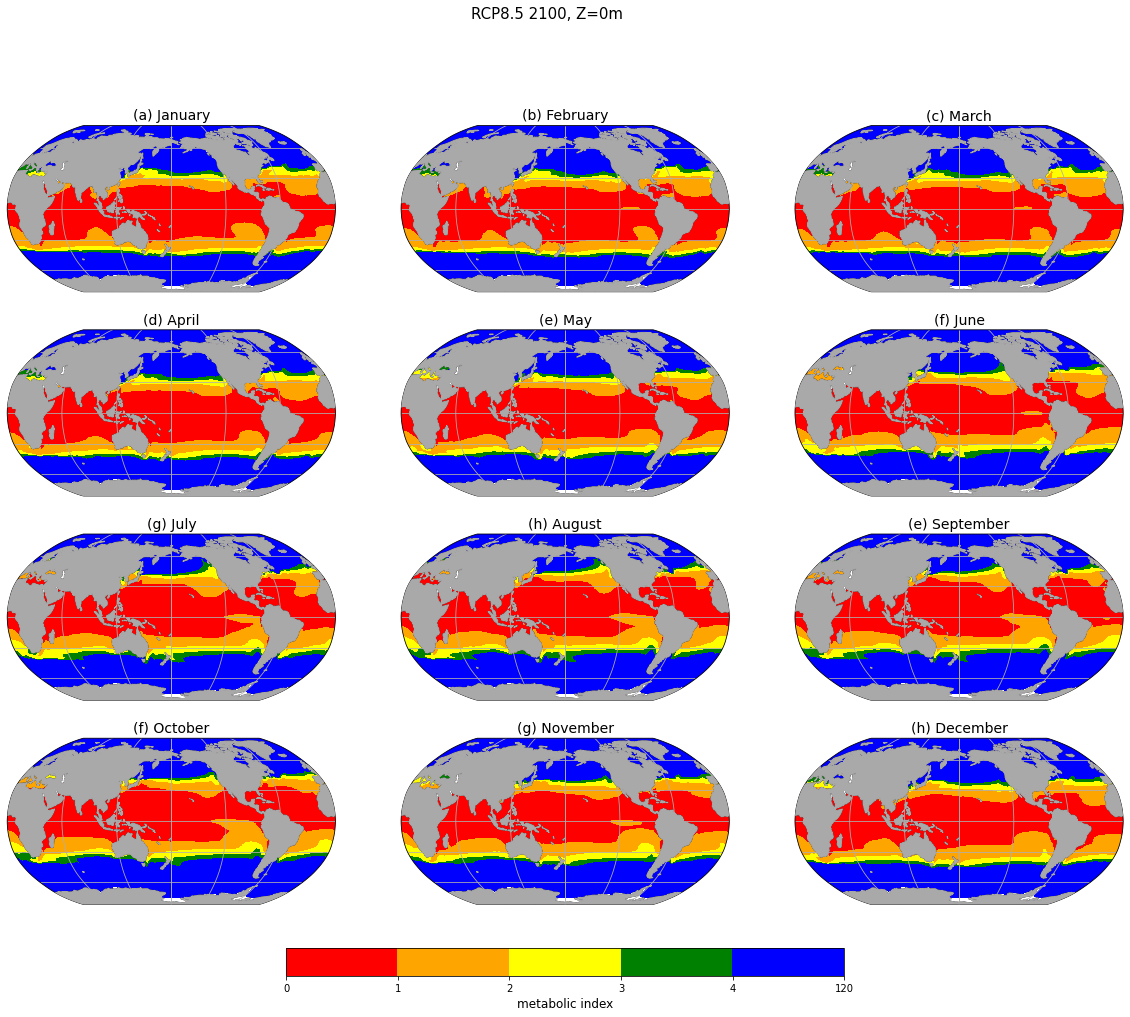

In [41]:
func.months_of_year(z0_divide, '2100', 'RCP8.5 2100, Z=0m')

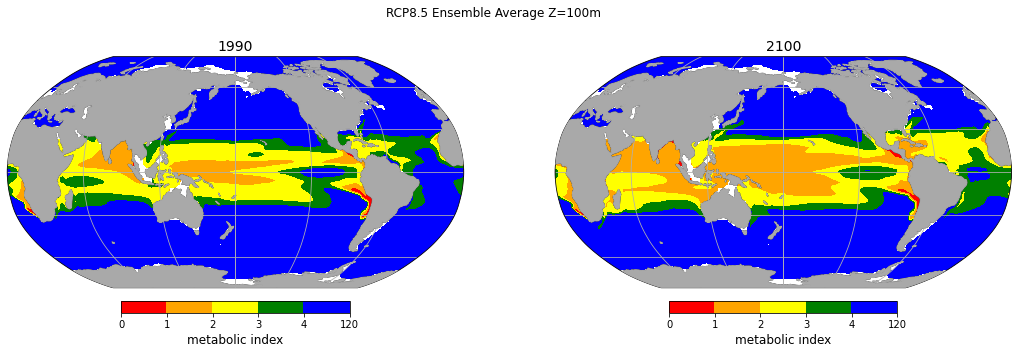

In [20]:
fig, (ax0,ax1) = plt.subplots(figsize=(18,5),nrows=1,ncols=2, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Ensemble Average Z=100m')
wn.filterwarnings('ignore')
func.graph(k11_avg, ax0, '1990', 1990, None, False)
func.graph(k11_avg, ax1, '2100', 2100, None, False)

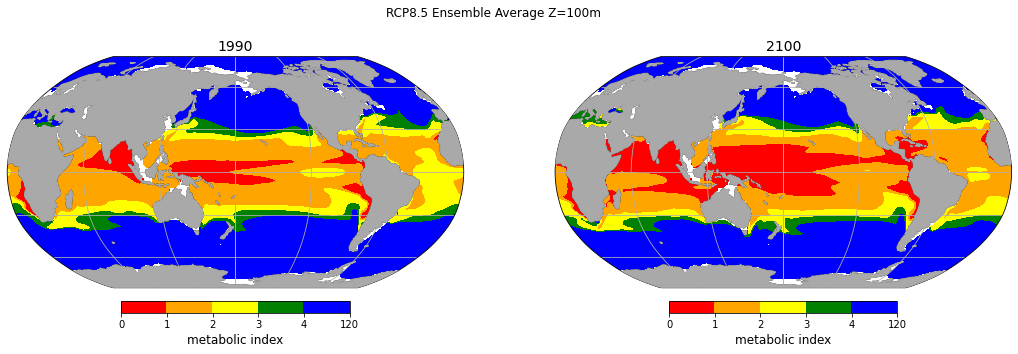

In [21]:
fig, (ax0,ax1) = plt.subplots(figsize=(18,5),nrows=1,ncols=2, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Ensemble Average Z=100m')
wn.filterwarnings('ignore')
func.graph(k11_divide, ax0, '1990', 1990, None, False)
func.graph(k11_divide, ax1, '2100', 2100, None, False)

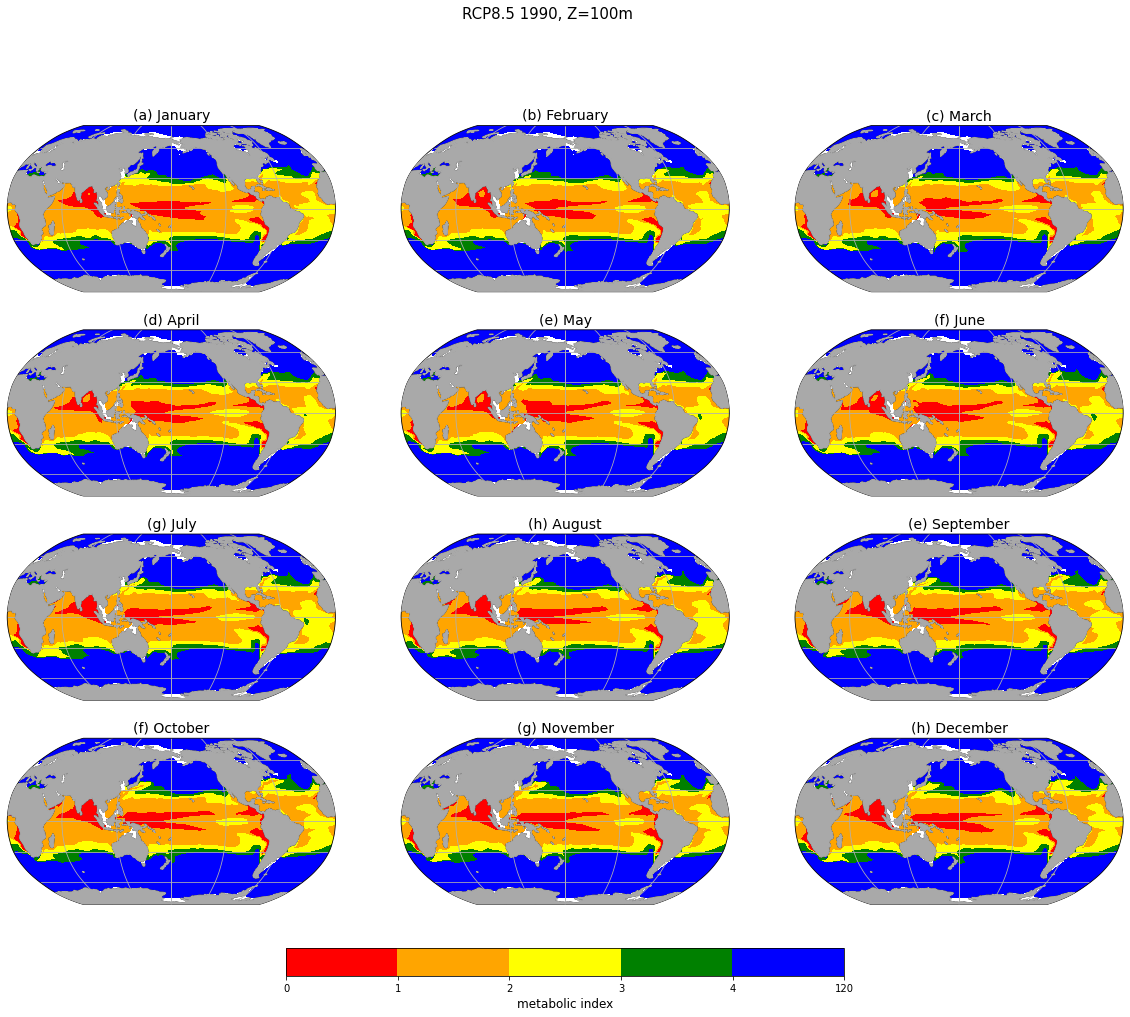

In [43]:
func.months_of_year(k11_divide, '1990', 'RCP8.5 1990, Z=100m')

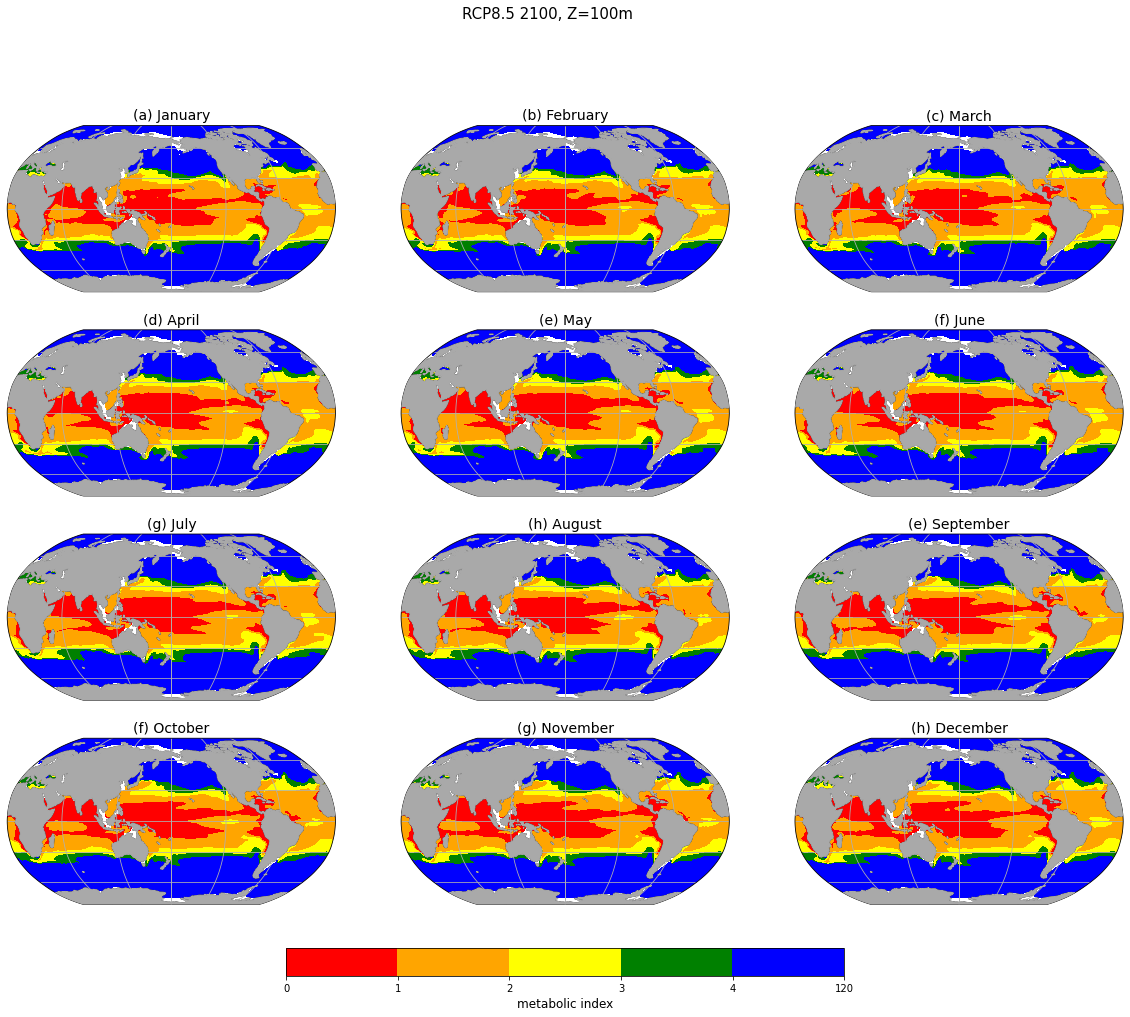

In [46]:
func.months_of_year(k11_divide, '2100', 'RCP8.5 2100, Z=100m')

In [3]:
z0_red = func.get_red(z0_divideAll, total).sel(time=slice('1990-01-16','2100-12-16'))
z0_or = func.get_orange(z0_divideAll, total).sel(time=slice('1990-01-16','2100-12-16'))
z0_yel = func.get_yellow(z0_divideAll, total).sel(time=slice('1990-01-16','2100-12-16'))

k11_red = func.get_red(k11_divideAll, total).sel(time=slice('1990-01-16','2100-12-16'))
k11_or = func.get_orange(k11_divideAll, total).sel(time=slice('1990-01-16','2100-12-16'))
k11_yel = func.get_yellow(k11_divideAll, total).sel(time=slice('1990-01-16','2100-12-16'))

NameError: name 'z0_divideAll' is not defined

In [29]:
def get_percent(ds, mi):
    ds_mi = ~np.isnan(ds.where(ds['MI']<mi))
    ds_miSum = ds_mi['MI'].sum(dim='xt_ocean').sum(dim='yt_ocean')
    ds_miPercent = (ds_miSum/total)*100
    return ds_miPercent

In [31]:
z0_allRed = get_percent(z0_divideAll, 1.0)
z0_allOr = get_percent(z0_divideAll, 2.0)
z0_allYel = get_percent(z0_divideAll, 3.0)

k11_allRed = get_percent(k11_divideAll, 1.0)
k11_allOr = get_percent(k11_divideAll, 2.0)
k11_allYel = get_percent(k11_divideAll, 3.0)

Text(0.5, 0, 'Year')

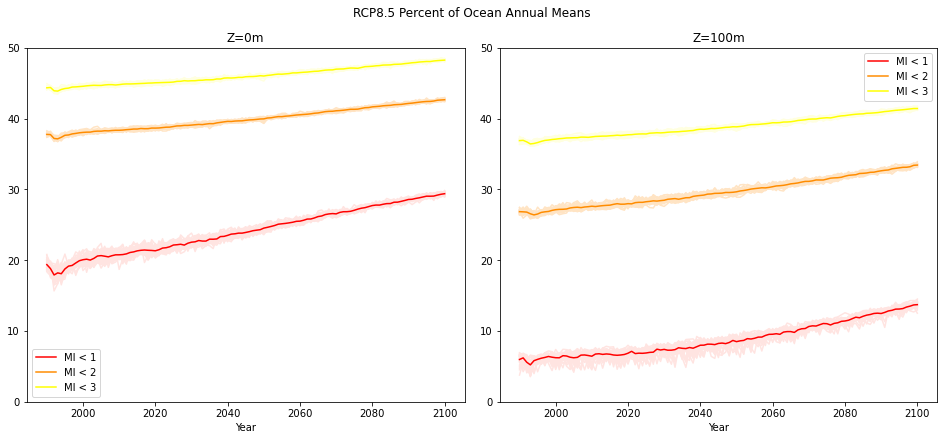

In [42]:
fig, (ax0,ax1) = plt.subplots(figsize=(13,6),ncols=2,constrained_layout=True)
fig.suptitle('RCP8.5 Percent of Ocean Annual Means')
wn.filterwarnings('ignore')

func.plot_allEns(z0_allRed.sel(time=slice('1990-01-16','2100-12-16')), ax0, 'mistyrose')
func.plot_allEns(z0_allOr.sel(time=slice('1990-01-16','2100-12-16')), ax0, 'bisque')
func.plot_allEns(z0_allYel.sel(time=slice('1990-01-16','2100-12-16')), ax0, 'lightyellow')
ax0.plot(np.unique(z0_red['time.year']),z0_red.groupby('time.year').mean(),color='red',label='MI < 1')
ax0.plot(np.unique(z0_or['time.year']),z0_or.groupby('time.year').mean(),color='darkorange',label='MI < 2')
ax0.plot(np.unique(z0_yel['time.year']),z0_yel.groupby('time.year').mean(),color='yellow',label='MI < 3')
ax0.set_title('Z=0m')
ax0.legend()
ax0.set_ylim(0,50)
ax0.set_xlabel('Year')

# func.percent_plot(ds_k11Avg, ax2, 'Depth k11', True, True, True, None, None, None,total)
func.plot_allEns(k11_allRed.sel(time=slice('1990-01-16','2100-12-16')), ax1, 'mistyrose')
func.plot_allEns(k11_allOr.sel(time=slice('1990-01-16','2100-12-16')), ax1, 'bisque')
func.plot_allEns(k11_allYel.sel(time=slice('1990-01-16','2100-12-16')), ax1, 'lightyellow')
ax1.plot(np.unique(k11_red['time.year']),k11_red.groupby('time.year').mean(),color='red',label='MI < 1')
ax1.plot(np.unique(k11_or['time.year']),k11_or.groupby('time.year').mean(),color='darkorange',label='MI < 2')
ax1.plot(np.unique(k11_yel['time.year']),k11_yel.groupby('time.year').mean(),color='yellow',label='MI < 3')
ax1.set_title('Z=100m')
ax1.legend()
ax1.set_ylim(0,50)
ax1.set_xlabel('Year')

Text(0.5, 0, 'Year')

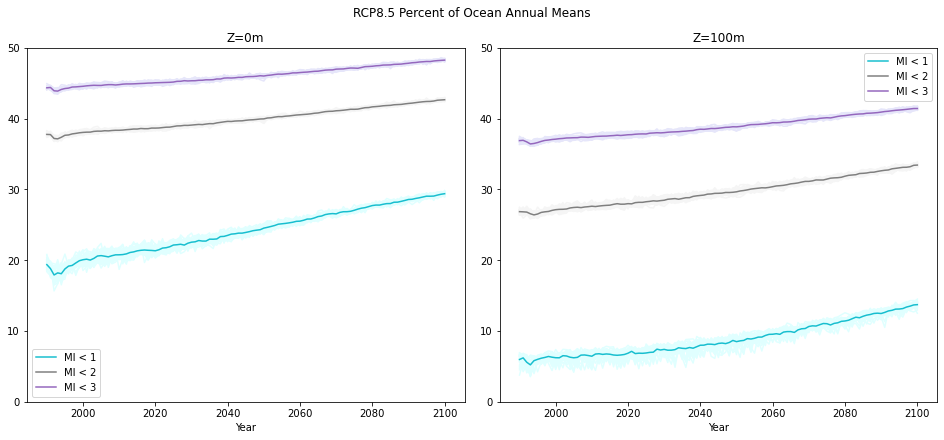

In [45]:
fig, (ax0,ax1) = plt.subplots(figsize=(13,6),ncols=2,constrained_layout=True)
fig.suptitle('RCP8.5 Percent of Ocean Annual Means')
wn.filterwarnings('ignore')

func.plot_allEns(z0_allRed.sel(time=slice('1990-01-16','2100-12-16')), ax0, 'lightcyan')
func.plot_allEns(z0_allOr.sel(time=slice('1990-01-16','2100-12-16')), ax0, 'whitesmoke')
func.plot_allEns(z0_allYel.sel(time=slice('1990-01-16','2100-12-16')), ax0, 'lavender')
ax0.plot(np.unique(z0_red['time.year']),z0_red.groupby('time.year').mean(),color='tab:cyan',label='MI < 1')
ax0.plot(np.unique(z0_or['time.year']),z0_or.groupby('time.year').mean(),color='tab:gray',label='MI < 2')
ax0.plot(np.unique(z0_yel['time.year']),z0_yel.groupby('time.year').mean(),color='tab:purple',label='MI < 3')
ax0.set_title('Z=0m')
ax0.legend()
ax0.set_ylim(0,50)
ax0.set_xlabel('Year')

# func.percent_plot(ds_k11Avg, ax2, 'Depth k11', True, True, True, None, None, None,total)
func.plot_allEns(k11_allRed.sel(time=slice('1990-01-16','2100-12-16')), ax1, 'lightcyan')
func.plot_allEns(k11_allOr.sel(time=slice('1990-01-16','2100-12-16')), ax1, 'whitesmoke')
func.plot_allEns(k11_allYel.sel(time=slice('1990-01-16','2100-12-16')), ax1, 'lavender')
ax1.plot(np.unique(k11_red['time.year']),k11_red.groupby('time.year').mean(),color='tab:cyan',label='MI < 1')
ax1.plot(np.unique(k11_or['time.year']),k11_or.groupby('time.year').mean(),color='tab:gray',label='MI < 2')
ax1.plot(np.unique(k11_yel['time.year']),k11_yel.groupby('time.year').mean(),color='tab:purple',label='MI < 3')
ax1.set_title('Z=100m')
ax1.legend()
ax1.set_ylim(0,50)
ax1.set_xlabel('Year')

In [47]:
def ds_month(ds, thresh):
    mi = ds.squeeze()
    mi_thresh = ~np.isnan(mi.where(mi['MI']<thresh))
    mi_month = mi_thresh.groupby('time.year').sum(dim='time')
    mi_mean = mi_month.mean(dim='ensemble')
    return mi_mean

In [49]:
z0_red = ds_month(z0_divideAll, 1.0)
z0_or = ds_month(z0_divideAll, 2.0)
z0_yel = ds_month(z0_divideAll, 3.0)
z0_gr = ds_month(z0_divideAll, 4.0)

k11_red = ds_month(k11_divideAll, 1.0)
k11_or = ds_month(k11_divideAll, 2.0)
k11_yel = ds_month(k11_divideAll, 3.0)
k11_gr = ds_month(k11_divideAll, 4.0)

In [50]:
def map_months(plot, ds, cmap, title, year):
    ds_sum = ds.sel(year=year)
    wn.filterwarnings('ignore')
    months = [0,1,2,3,4,5,6,7,8,9,10,11,12]
    bounds = np.arange(1,13,1)
    crs = ccrs.PlateCarree()
    X = ds_sum['xt_ocean']
    Y = ds_sum['yt_ocean']
    Z = ds_sum['MI'].squeeze()
    Z, X = add_cyclic_point(Z,coord=X)
    im = plot.contourf(X,Y,Z,months,cmap=cmap,transform=crs,extend='min')
    
    # Add a land mask to your plot, as well as grid lines and coastlines
    plot.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
    plot.gridlines()
    plot.coastlines()
    plot.set_title(title,fontsize=14,loc='center')
    #im.cmap.set_under('lightcyan')  
    #im.set_clim(0, 1) 
    return im

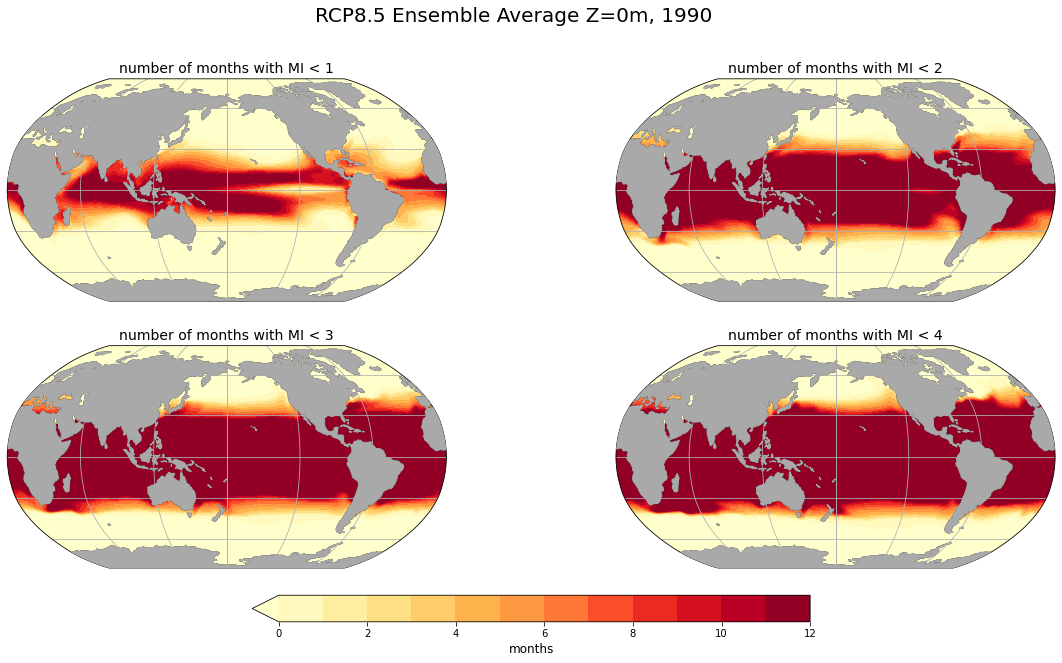

In [52]:
fig,axs = plt.subplots(figsize=(20,10),nrows=2,ncols=2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Ensemble Average Z=0m, 1990',fontsize=20)
map_months(axs[0,0], z0_red, 'YlOrRd', 'number of months with MI < 1', 1990)
map_months(axs[0,1], z0_or, 'YlOrRd', 'number of months with MI < 2', 1990)
map_months(axs[1,0], z0_yel, 'YlOrRd', 'number of months with MI < 3', 1990)
im = map_months(axs[1,1], z0_gr, 'YlOrRd', 'number of months with MI < 4', 1990)
cbar = plt.colorbar(im,ax=axs,orientation='horizontal',fraction=0.05,pad=0.05,shrink=0.5)
cbar.set_label('months',fontsize=12)

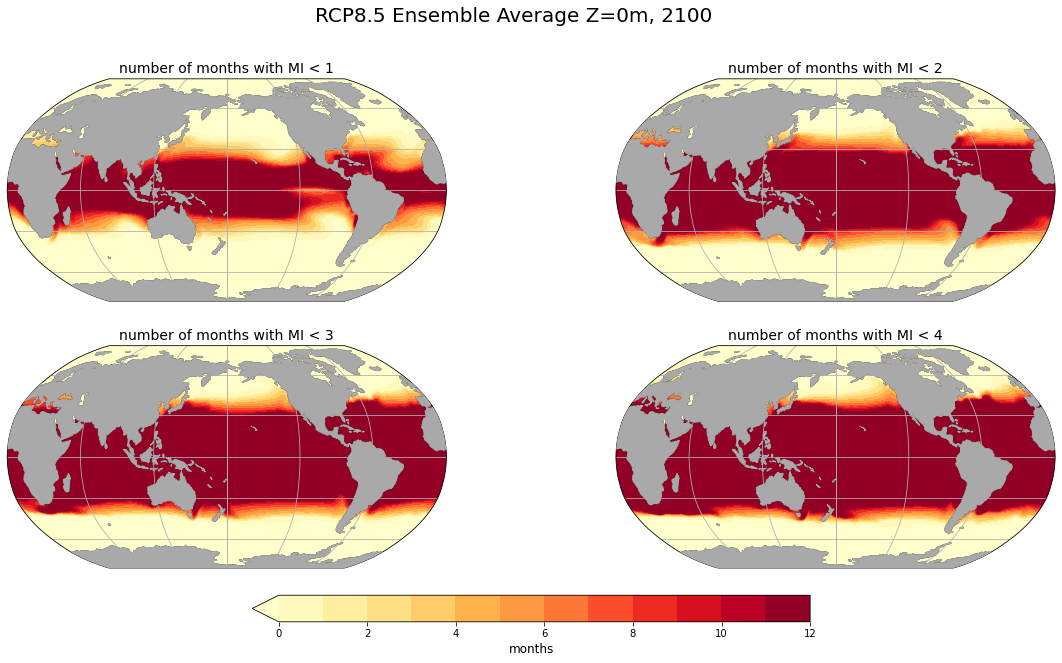

In [51]:
fig,axs = plt.subplots(figsize=(20,10),nrows=2,ncols=2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Ensemble Average Z=0m, 2100',fontsize=20)
map_months(axs[0,0], z0_red, 'YlOrRd', 'number of months with MI < 1', 2100)
map_months(axs[0,1], z0_or, 'YlOrRd', 'number of months with MI < 2', 2100)
map_months(axs[1,0], z0_yel, 'YlOrRd', 'number of months with MI < 3', 2100)
im = map_months(axs[1,1], z0_gr, 'YlOrRd', 'number of months with MI < 4', 2100)
cbar = plt.colorbar(im,ax=axs,orientation='horizontal',fraction=0.05,pad=0.05,shrink=0.5)
cbar.set_label('months',fontsize=12)

In [ ]:
fig,axs = plt.subplots(figsize=(20,10),nrows=2,ncols=2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Ensemble Average Z=100m, 2100',fontsize=20)
map_months(axs[0,0], k11_red, 'YlOrRd', 'number of months with MI < 1', 2100)
map_months(axs[0,1], k11_or, 'YlOrRd', 'number of months with MI < 2', 2100)
map_months(axs[1,0], k11_yel, 'YlOrRd', 'number of months with MI < 3', 2100)
im = map_months(axs[1,1], k11_gr, 'YlOrRd', 'number of months with MI < 4', 2100)
cbar = plt.colorbar(im,ax=axs,orientation='horizontal',fraction=0.05,pad=0.05,shrink=0.5)
cbar.set_label('months',fontsize=12)